In this notebook, I attempted to develop a KNN classifier from scratch. It is an open-to-develop model, so I would be glad to hear your suggestions.

In [1]:
#To develop the KNN classifier from scratch
from collections import Counter

#To evaluate the performance of the model
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Developing the KNN classifier from scratch

In [2]:
# Minkowski distance formula for classifier
def minkowski(x,y,p):
    inner=[]
    for i in range(len(x)):
        inner.append(pow((abs(x[i]-y[i])),p))
    dist=pow(sum(inner),1/p)
    return dist

In [3]:
class KNN_classifier: 
    def __init__(self,k=5,p=2):
        self.k = k
        self.p = p
        
    #List to hold x_train and y_train together   
    def labeled_data(self, x_train, y_train):
        self.labeled_data=list(zip(x_train,y_train))        
        
    #Prediction method    
    def predictor(self, x_test):        
        predictions=[]
        for point in x_test:
            distances=[]
            for line in self.labeled_data:                
                distances.append([(minkowski(point,line[0],self.p)),line[-1]])
                
            distances.sort(key=lambda x: x[0])
            classes=list(map(lambda x: x[1], distances[:self.k]))
            predictions.append(Counter(classes).most_common()[0][0])
               
        return predictions  

## Testing the performance of the model

I used "seeds Data Set" from UCI for testing my classifier.

In [4]:
file = open("seeds_dataset.txt","r+") 
raw_data=file.readlines() 
file.close()

In [5]:
data_list=[]
for line in raw_data:
    line=line.replace("\n","")
    data_list.append(line.split("\t"))

data_list=list(np.float_(data_list))
data_array=np.array(data_list)
print(data_array.shape)
print(data_array[:5,:])

(210, 8)
[[15.26   14.84    0.871   5.763   3.312   2.221   5.22    1.    ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956   1.    ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825   1.    ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805   1.    ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175   1.    ]]


In the seed data set, the first 7 columns hold the features and the last column holds the labels. We have a total of 210 data belonging to 3 classes, without any null-values.

In [6]:
features=data_array[:,:7]
label=data_array[:,7:8].reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0, stratify=label)

Let's evaluate the performance of KNN classifiers, both developed by me and available on Sklearn for different k values.

In [7]:
#My KNN classifier
start = time.time()
my_accuracies=[]
my_confusion_matrices=[]
my_times=[]
#k parameter tuning
for i in range(1,20):
    inner_start = time.time()
    
    #model
    knn = KNN_classifier(k=i)
    knn.labeled_data(X_train,y_train)
    predicted=knn.predictor(X_test)
    
    #indicators
    my_accuracies.append([(accuracy_score(y_test, predicted)),i])
    my_confusion_matrices.append([(confusion_matrix(y_test, predicted)),i])
    inner_end = time.time()
    my_times.append([(inner_end-inner_start),i])
    
end = time.time()
print("Total Time:",end - start)

sorted_my_accuracies=sorted(my_accuracies,key=lambda x: x[0], reverse=True)  
print("Top 5 Accuracies:",my_accuracies[:5])

Total Time: 3.5362274646759033
Top 5 Accuracies: [[0.9047619047619048, 1], [0.9047619047619048, 2], [0.8888888888888888, 3], [0.8888888888888888, 4], [0.8888888888888888, 5]]


In [8]:
#sklearn's KNN classifier
start = time.time()
sklearn_accuracies=[]
sklearn_confusion_matrices=[]
sklearn_times=[]
#k parameter tuning
for i in range(1,20):
    inner_start = time.time()
    
    #model
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    #indicators
    sklearn_accuracies.append([(accuracy_score(y_test, y_pred)),i])
    sklearn_confusion_matrices.append([(confusion_matrix(y_test, y_pred)),i])
    inner_end = time.time()
    sklearn_times.append([(inner_end-inner_start),i])
end = time.time()
print("Total Time:",end - start)    

sorted_sklearn_accuracies=sorted(sklearn_accuracies,key=lambda x: x[0], reverse=True)  
print("Top 5 Accuracies:",sorted_sklearn_accuracies[:5])

Total Time: 0.15264010429382324
Top 5 Accuracies: [[0.9047619047619048, 1], [0.9047619047619048, 2], [0.9047619047619048, 6], [0.9047619047619048, 7], [0.9047619047619048, 8]]


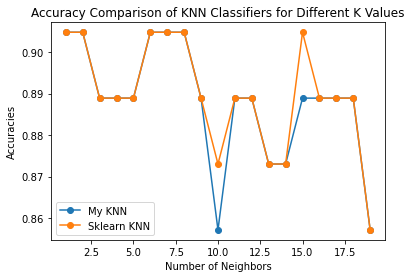

In [9]:
x=range(1,20)
plt.plot(x, list(map(lambda x: x[0], my_accuracies)),marker='o', label = "My KNN")
plt.plot(x, list(map(lambda x: x[0], sklearn_accuracies)), marker='o',label = "Sklearn KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracies")
plt.title('Accuracy Comparison of KNN Classifiers for Different K Values')
plt.legend()
plt.show()

My model appears to give lower accuracy for k = 10 and k = 15 compared to the Sklearn model. However, the same accuracy result was obtained for k values other than that.

In [10]:
print("My results for k=2")
print("------------------")
print("Accuracy:", my_accuracies[1][0] )
print("Time:",my_times[1][0])
print("Confusion Matrix:\n",confusion_matrix(y_test, predicted))
print("****************************************")
print("Sklearn results for k=2")
print("------------------")
print("Accuracy:", sklearn_accuracies[1][0] )
print("Time:",sklearn_times[1][0])
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

My results for k=2
------------------
Accuracy: 0.9047619047619048
Time: 0.09490180015563965
Confusion Matrix:
 [[15  2  4]
 [ 2 19  0]
 [ 1  0 20]]
****************************************
Sklearn results for k=2
------------------
Accuracy: 0.9047619047619048
Time: 0.009358882904052734
Confusion Matrix:
 [[15  2  4]
 [ 2 19  0]
 [ 1  0 20]]


When we compare the models for k = 2, which is one of the small k values that gives the highest accuracy in both classifiers, it is seen that the confusion matrices are the same. The most significant difference appears to be time for the k = 2 value. Sklearn's KNN arranges the data for finding the closest neighbors efficiently during the prediction phase. Since my model does not do such a process, the time difference is an expected result and this part can be improved. 